In [14]:
!git clone https://github.com/juliobento9131/IT304S_Trabalho_Parte_2.git

Cloning into 'IT304S_Trabalho_Parte_2'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 42 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (42/42), done.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

#Dataset

In [16]:
UC1 = pd.read_csv("/content/IT304S_Trabalho_Parte_2/UC1.csv")

# Dividimos o dataset em Treino e Test

In [18]:
df_train = UC1["CONSUMO_TOTAL"].iloc[:63]
df_test = UC1["CONSUMO_TOTAL"].iloc[63:]

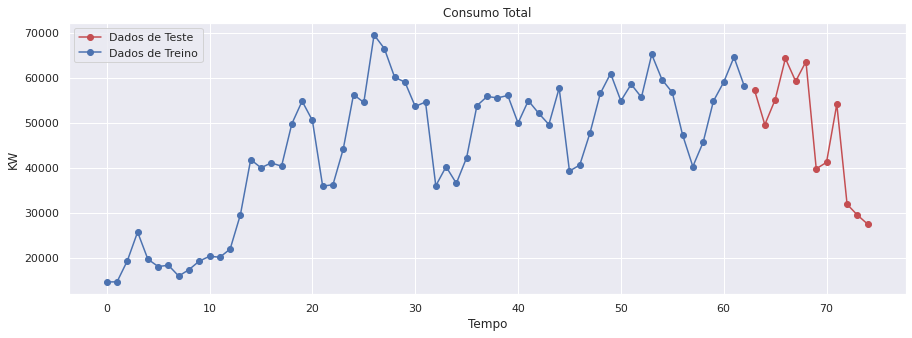

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados de Teste', 'Dados de Treino'])
_ = plt.title("Consumo Total")
plt.show()

#Função para obter X e Y

In [44]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
             break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [45]:
X_train, Y_train = split_sequence(df_train.values,1)
X_test, Y_test = split_sequence(df_test.values,1)


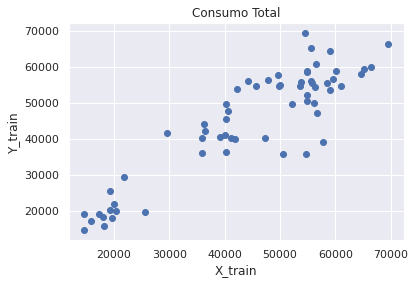

In [46]:
plt.scatter(X_train,Y_train)
_ = plt.title("Consumo Total")
_ = plt.xlabel("X_train")
_ = plt.ylabel("Y_train")

#Modelo

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
modelo = LinearRegression() 
modelo.fit(X_train, Y_train) # treinamento do modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
modelo.coef_

array([0.87838927])

#Previsões

In [ ]:
previsoes = modelo.predict(X_test)
df_previsoes = pd.DataFrame(previsoes,index=range(57,68,1))

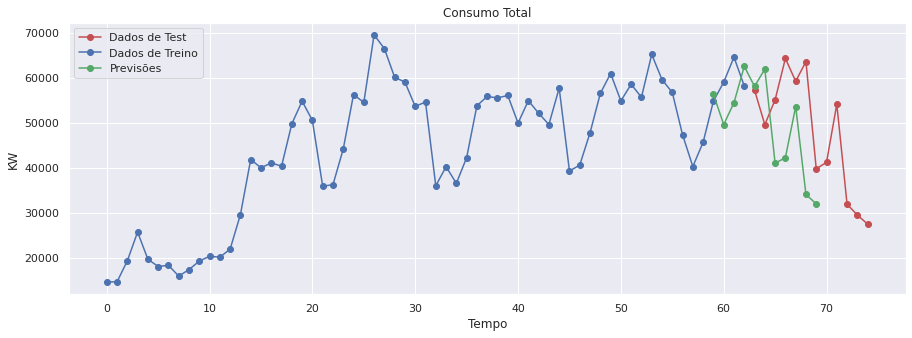

In [36]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(df_previsoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

#Avaliação

In [ ]:
def RMSE(yh, y):
  er = yh - y
  RMSE = sum(er*er/len(er))**0.5
  return RMSE

#RMSE Absoluto

In [ ]:
print("RMSE Absoluto do Modelo = ",RMSE(previsoes, Y_test))

RMSE Absoluto do Modelo =  5998.678121317746


#RMSE Percentual

In [ ]:
print("RMSE Percentual do Modelo = ",RMSE(previsoes, Y_test)/max(df_train) * 100, "%")

RMSE Percentual do Modelo =  17.52001554168564 %


# Experimento 1: Uso de Normalização Min Max

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = df_train.values.reshape((57, 1))
scaler = MinMaxScaler()
scaler.fit(data)
data_norm = scaler.transform(data)
data_norm = data_norm.reshape(57)

In [ ]:
X_train_norm, Y_train_norm = split_sequence(data_norm,1)

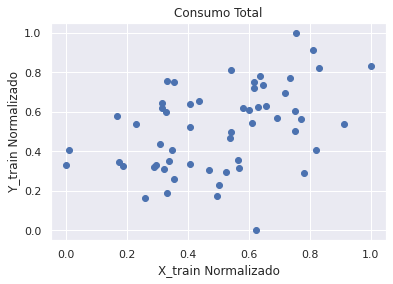

In [ ]:
plt.scatter(X_train_norm,Y_train_norm)
_ = plt.title("Consumo Total")
_ = plt.xlabel("X_train Normalizado")
_ = plt.ylabel("Y_train Normalizado")

In [ ]:
modelo = LinearRegression() 
modelo.fit(X_train_norm, Y_train_norm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test_norm = scaler.transform(X_test)

In [ ]:
previsoes_norm = modelo.predict(X_test_norm)

In [ ]:
previsoes = scaler.inverse_transform(previsoes_norm.reshape((11, 1)))
df_previsoes = pd.DataFrame(previsoes,index=range(57,68,1))

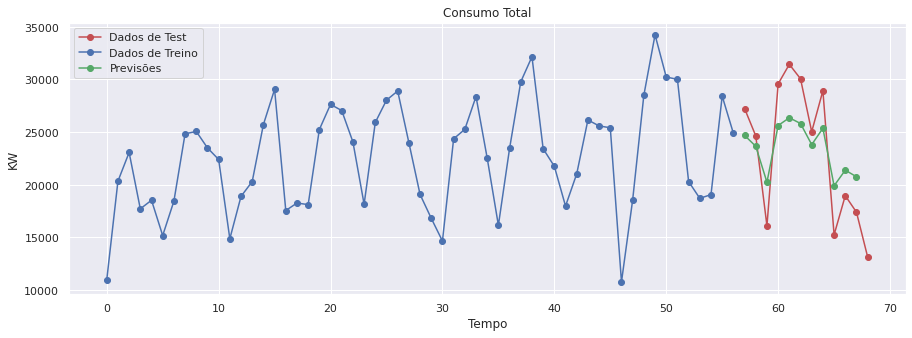

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(df_previsoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

In [ ]:
print("RMSE Absoluto do Modelo = ",RMSE(previsoes.reshape(11), Y_test))

RMSE Absoluto do Modelo =  5998.6781213177455


In [ ]:
print("RMSE Percentual do Modelo = ",RMSE(previsoes.reshape(11), Y_test)/max(df_train) * 100, "%")

RMSE Percentual do Modelo =  17.520015541685638 %


# Experimento 2: 

RMSE da Previsão de Junho =  125.127316439266
RMSE da Previsão de Julho =  2613.0336820839875
RMSE da Previsão de Agosto =  84.47523621705659
RMSE da Previsão de Setembro =  4981.690710115745
RMSE da Previsão de Outubro =  5737.909706551145
RMSE da Previsão de Novembro =  675.6985157036688
RMSE da Previsão de Dezembro =  1470.8750306231523
RMSE da Previsão de Janeiro =  8840.4050371118
RMSE da Previsão de Fevereiro =  2342.997913957195
RMSE da Previsão de Março =  1100.0766730175674
RMSE da Previsão de Abril =  13142.909514837585
RMSE da Previsão de Maio =  13253.143552904112


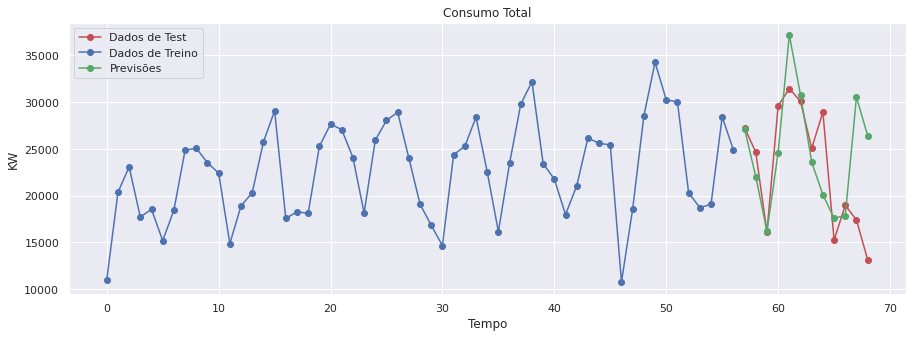

RMSE Absoluto do Modelo =  4530.6952407968565


In [ ]:
# Vamos criar um modelo por cada mes.
# PEGAMOS OS dados separados por meses é dizer pegamos todos os dados de janeiro dos nao 2014,2016,2017,2018,2019 prevvemos 2020 e assim para todos os meses. 
Lista_previsoes = []
Lista_RMSE = []
#Modelo Junho
data = UC1[UC1['MÊS']=="Junho"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:4]
df_test = data["Consumo Total"].iloc[4:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_junho = LinearRegression() 
modelo_junho.fit(X_train, Y_train)
previsoes = modelo_junho.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Junho = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Julho
data = UC1[UC1['MÊS']=="Julho"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:5]
df_test = data["Consumo Total"].iloc[5:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_julho = LinearRegression() 
modelo_julho.fit(X_train, Y_train)
previsoes = modelo_julho.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Julho = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Agosto
data = UC1[UC1['MÊS']=="Agosto"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:4]
df_test = data["Consumo Total"].iloc[4:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_agosto = LinearRegression() 
modelo_agosto.fit(X_train, Y_train)
previsoes = modelo_agosto.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Agosto = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Setembro
data = UC1[UC1['MÊS']=="Setembro"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:4]
df_test = data["Consumo Total"].iloc[4:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_setembro = LinearRegression() 
modelo_setembro.fit(X_train, Y_train)
previsoes = modelo_setembro.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Setembro = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Outubro
data = UC1[UC1['MÊS']=="Outubro"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:5]
df_test = data["Consumo Total"].iloc[5:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_outubro = LinearRegression() 
modelo_outubro.fit(X_train, Y_train)
previsoes = modelo_outubro.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Outubro = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Novembro
data = UC1[UC1['MÊS']=="Novembro"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:5]
df_test = data["Consumo Total"].iloc[5:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_novembro = LinearRegression() 
modelo_novembro.fit(X_train, Y_train)
previsoes = modelo_novembro.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Novembro = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Dezembro
data = UC1[UC1['MÊS']=="Dezembro"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:5]
df_test = data["Consumo Total"].iloc[5:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_dezembro = LinearRegression() 
modelo_dezembro.fit(X_train, Y_train)
previsoes = modelo_dezembro.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Dezembro = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Janeiro
data = UC1[UC1['MÊS']=="Janeiro"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:5]
df_test = data["Consumo Total"].iloc[5:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_janeiro = LinearRegression() 
modelo_janeiro.fit(X_train, Y_train)
previsoes = modelo_janeiro.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Janeiro = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Fevereiro
data = UC1[UC1['MÊS']=="Fevereiro"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:5]
df_test = data["Consumo Total"].iloc[5:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_fevereiro = LinearRegression() 
modelo_fevereiro.fit(X_train, Y_train)
previsoes = modelo_fevereiro.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Fevereiro = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Março
data = UC1[UC1['MÊS']=="Março"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:5]
df_test = data["Consumo Total"].iloc[5:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_marzo = LinearRegression() 
modelo_marzo.fit(X_train, Y_train)
previsoes = modelo_marzo.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Março = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Abril
data = UC1[UC1['MÊS']=="Abril"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:5]
df_test = data["Consumo Total"].iloc[5:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_abril = LinearRegression() 
modelo_abril.fit(X_train, Y_train)
previsoes = modelo_abril.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Abril = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))
#Modelo Maio
data = UC1[UC1['MÊS']=="Maio"][["Consumo Total"]]
df_train = data["Consumo Total"].iloc[:4]
df_test = data["Consumo Total"].iloc[4:]
X_train, Y_train = split_sequence(df_train.values,1)
Y_test = df_test.values
X_test = np.array(Y_train[-1])
modelo_Maio = LinearRegression() 
modelo_Maio.fit(X_train, Y_train)
previsoes = modelo_Maio.predict(X_test.reshape((1,1)))
Lista_previsoes.append(previsoes[0])
print("RMSE da Previsão de Maio = ", RMSE(previsoes, Y_test))
Lista_RMSE.append(RMSE(previsoes, Y_test))

df_train = UC1["Consumo Total"].iloc[:57]
df_test = UC1["Consumo Total"].iloc[57:]
df_previsoes = pd.DataFrame(Lista_previsoes,index=range(57,69,1))

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_test, marker='o', color="r")
_ = plt.plot(df_train, marker='o', color="b")
_ = plt.plot(df_previsoes, marker='o', color="g")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados de Test', 'Dados de Treino', 'Previsões'])
_ = plt.title("Consumo Total")
plt.show()

print("RMSE Absoluto do Modelo = ", np.mean(Lista_RMSE))

#Notese Que o Modelo proposto no experimento 2 tem 4.29 % menos erro do que os outros modelos 

In [ ]:
print("RMSE Percentual do Modelo = ",np.mean(Lista_RMSE)/max(df_train) * 100, "%")

RMSE Percentual do Modelo =  13.232557144767243 %


#Previsão Final do consumo para o proximo ano utilizando nosso melhor modelo

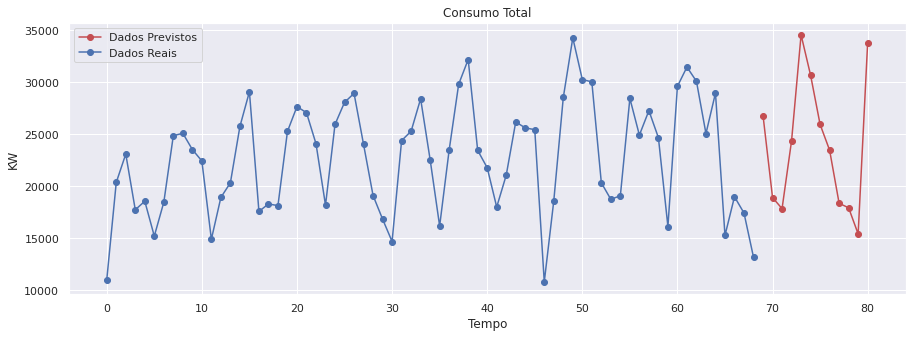

In [ ]:
Lista_previsoes = []
previsoes = modelo_junho.predict(np.array(df_test.iloc[0]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_julho.predict(np.array(df_test.iloc[1]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_agosto.predict(np.array(df_test.iloc[2]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_setembro.predict(np.array(df_test.iloc[3]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_outubro.predict(np.array(df_test.iloc[4]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_novembro.predict(np.array(df_test.iloc[5]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_dezembro.predict(np.array(df_test.iloc[6]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_janeiro.predict(np.array(df_test.iloc[7]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_fevereiro.predict(np.array(df_test.iloc[8]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_marzo.predict(np.array(df_test.iloc[9]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_abril.predict(np.array(df_test.iloc[10]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])
previsoes = modelo_Maio.predict(np.array(df_test.iloc[11]).reshape((1,1)))
Lista_previsoes.append(previsoes[0])

df_previsoes = pd.DataFrame(Lista_previsoes,index=range(69,81,1))

fig, ax = plt.subplots(figsize=(15, 5))
_ = plt.plot(df_previsoes, marker='o', color="r")
_ = plt.plot(UC1["Consumo Total"], marker='o', color="b")
_ = plt.xlabel("Tempo")
_ = plt.ylabel("KW")
_ = plt.legend([ 'Dados Previstos', 'Dados Reais'])
_ = plt.title("Consumo Total")
plt.show()